In [3]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [10]:
(train_X,train_Y),(test_X,test_Y)=keras.datasets.mnist.load_data()
train_X=train_X/255.0
train_Y=train_Y/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
train_X.shape

(60000, 28, 28)

In [9]:
train_Y.shape

(60000,)

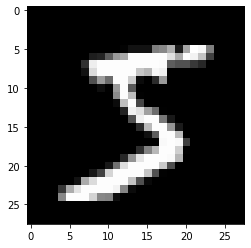

In [11]:
plt.imshow(train_X[0],cmap='gray')
plt.show()

In [0]:
train_X=train_X.reshape(-1,28*28)
test_X=test_X.reshape(-1,28*28)

In [13]:
train_X.shape

(60000, 784)

AE using fully connected layers

In [20]:
model=keras.Sequential([
                        keras.layers.Dense(units=784,activation='relu',input_shape=(784,)),
                        keras.layers.Dense(units=64,activation='relu'),
                        keras.layers.Dense(units=784,activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(),loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(train_X,train_X,epochs=10,batch_size=32)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0041
Epoch 2/10
60000/60000 [==============================] - 10s 170us/sample - loss: 0.0040
Epoch 3/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0039
Epoch 4/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0039
Epoch 5/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0038
Epoch 6/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.0038
Epoch 7/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0037
Epoch 8/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0036
Epoch 9/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0036
Epoch 10/10
60000/60000 [==============================] - 10s 175us/sample - loss: 0.0036


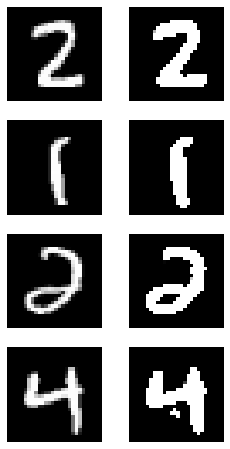

In [33]:
plt.figure(figsize=(4,8))
random.seed(42)

for c in range(4):
  plt.subplot(4,2,c*2+1)
  rand_idx=random.randint(0,test_X.shape[0])
  plt.imshow(test_X[rand_idx].reshape(28,28),cmap='gray')
  plt.axis('off')

  plt.subplot(4,2,c*2+2)
  img=model.predict(test_X[rand_idx].reshape(-1,784))
  plt.imshow(img.reshape(28,28),cmap='gray')
  plt.axis('off')

In [34]:
model.evaluate(test_X,test_X) #loss 장난아님.... 어떡해

10000/10000 [==============================] - 1s 74us/sample - loss: 7343.6589


7343.6589484375

AE using convolution layers

In [0]:
# add channel demention
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

In [38]:
model=keras.Sequential([
                        keras.layers.Conv2D(filters=32,kernel_size=2,strides=(2,2),activation='relu',input_shape=(28,28,1)),
                        keras.layers.Conv2D(filters=64,kernel_size=2,strides=(2,2),activation='relu'), #output_size=(7*7)*64

                        keras.layers.Flatten(),
                        keras.layers.Dense(units=64,activation='relu'),# 잠재변수 model=keras.Sequential(latent variable)

                        keras.layers.Dense(units=7*7*64,activation='relu'), 
                        keras.layers.Reshape(target_shape=(7,7,64)),

                        keras.layers.Conv2DTranspose(filters=32,kernel_size=2,strides=(2,2),padding='same',activation='relu'),
                        keras.layers.Conv2DTranspose(filters=1,kernel_size=2,strides=(2,2),padding='same',activation='sigmoid') # output_shape==input_shape (28,28,1)


])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_7 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)       

In [40]:
model.fit(train_X,train_X,epochs=20,batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0780
Epoch 2/20
60000/60000 [==============================] - 19s 319us/sample - loss: 0.0298
Epoch 3/20
60000/60000 [==============================] - 20s 327us/sample - loss: 0.0205
Epoch 4/20
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0183
Epoch 5/20
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0172
Epoch 6/20
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0165
Epoch 7/20
60000/60000 [==============================] - 19s 315us/sample - loss: 0.0161
Epoch 8/20
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0158
Epoch 9/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0155
Epoch 10/20
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0154
Epoch 11/20
60000/60000 [==============================] - 21s 343us/sample 

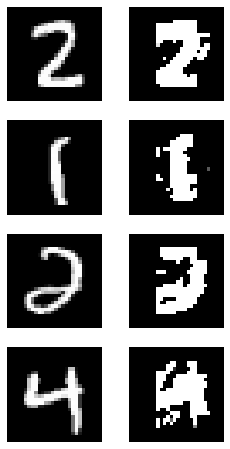

In [45]:
plt.figure(figsize=(4,8))
random.seed(42)

for c in range(4):
  plt.subplot(4,2,c*2+1)
  rand_idx=random.randint(0,test_X.shape[0])
  plt.imshow(test_X[rand_idx].reshape(28,28),cmap='gray')
  plt.axis('off')

  plt.subplot(4,2,c*2+2)
  img=model.predict(test_X[rand_idx].reshape(-1,28,28,1))
  plt.imshow(img.reshape(28,28),cmap='gray')
  plt.axis('off')

In [46]:
model.evaluate(test_X,test_X)

10000/10000 [==============================] - 2s 169us/sample - loss: 7350.4218


7350.4217640625

In [8]:
# using 'elu' activation function


model=keras.Sequential([
                        keras.layers.Conv2D(filters=32,kernel_size=2,strides=(2,2),activation='elu',input_shape=(28,28,1)),
                        keras.layers.Conv2D(filters=64,kernel_size=2,strides=(2,2),activation='elu'), #output_size=(7*7)*64

                        keras.layers.Flatten(),
                        keras.layers.Dense(units=64,activation='relu'),# 잠재변수 model=keras.Sequential(latent variable)

                        keras.layers.Dense(units=7*7*64,activation='relu'), 
                        keras.layers.Reshape(target_shape=(7,7,64)),

                        keras.layers.Conv2DTranspose(filters=32,kernel_size=2,strides=(2,2),padding='same',activation='elu'),
                        keras.layers.Conv2DTranspose(filters=1,kernel_size=2,strides=(2,2),padding='same',activation='sigmoid') # output_shape==input_shape (28,28,1)


])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='mse')
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________

In [15]:
model.fit(train_X,train_X,epochs=20,batch_size=256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 288us/sample - loss: 0.0676
Epoch 2/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0291
Epoch 3/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0218
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0190
Epoch 5/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0176
Epoch 6/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0168
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0163
Epoch 8/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0159
Epoch 9/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0157
Epoch 10/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0154
Epoch 11/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0153
Epoch

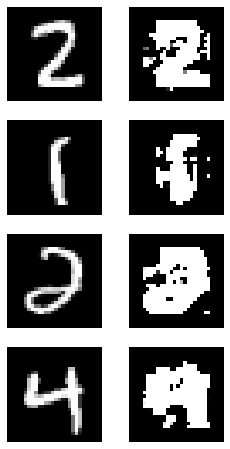

In [49]:
plt.figure(figsize=(4,8))
random.seed(42)

for c in range(4):
  plt.subplot(4,2,c*2+1)
  rand_idx=random.randint(0,test_X.shape[0])
  plt.imshow(test_X[rand_idx].reshape(28,28),cmap='gray')
  plt.axis('off')

  plt.subplot(4,2,c*2+2)
  img=model.predict(test_X[rand_idx].reshape(-1,28,28,1))
  plt.imshow(img.reshape(28,28),cmap='gray')
  plt.axis('off')

In [50]:
model.evaluate(test_X,test_X)

10000/10000 [==============================] - 2s 220us/sample - loss: 7344.2087


7344.208690625

k-means clustering

In [0]:
latent_vector_model=keras.Model(inputs=model.input,outputs=model.layers[3].output)
latent_vector=latent_vector_model.predict(train_X)

In [18]:
latent_vector.shape

(60000, 64)

In [20]:
%%time

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10,n_init=10,random_state=42)
kmeans.fit(latent_vector)

CPU times: user 20.1 s, sys: 4.02 s, total: 24.1 s
Wall time: 19.5 s


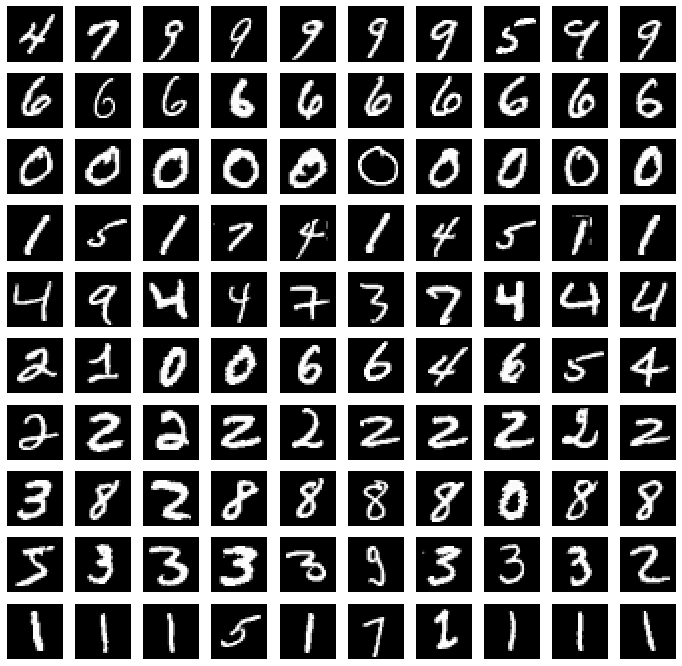

In [22]:
plt.figure(figsize=(12,12))

for i in range(10):
  images=train_X[kmeans.labels_==i]
  for c in range(10):
    plt.subplot(10,10,i*10+c+1)
    plt.imshow(images[c].reshape(28,28),cmap='gray')
    plt.axis('off')

plt.show()

t-SNE

In [25]:
%%time

from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,learning_rate=100,perplexity=15,random_state=0)
tsne_vector=tsne.fit_transform(latent_vector[:5000])

NameError: ignored

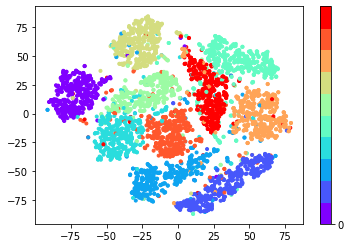

In [35]:
fig=plt.scatter(tsne_vector[:,0],tsne_vector[:,1],marker='.',c=train_Y[:5000],cmap=plt.get_cmap('rainbow',10))


#n_clusters=10
cb=plt.colorbar(fig,ticks=range(10))
#tick_locks=(np.arange(n_clusters)+0.5)*(n_clusters-1)/n_clusters
#cb.set_ticks(tick_locks)
cb.set_ticklabels(range(10))

plt.show()

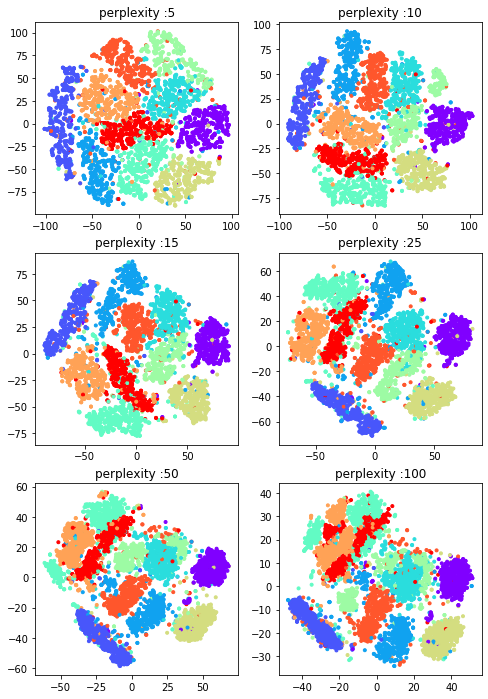

CPU times: user 10min 18s, sys: 1.76 s, total: 10min 20s
Wall time: 5min 28s


In [36]:
%%time

perplexities=[5,10,15,25,50,100]
plt.figure(figsize=(8,12))

for c in range(6):
  tsne=TSNE(n_components=2,learning_rate=100,perplexity=perplexities[c],random_state=10)
  tsne_vector=tsne.fit_transform(latent_vector[:5000])

  plt.subplot(3,2,c+1)
  plt.scatter(tsne_vector[:,0],tsne_vector[:,1],marker='.',c=train_Y[:5000],cmap='rainbow')
  plt.title('perplexity :{0}'.format(perplexities[c]))

plt.show()